# ***Digital Marketing Campaign Conversion Prediction***

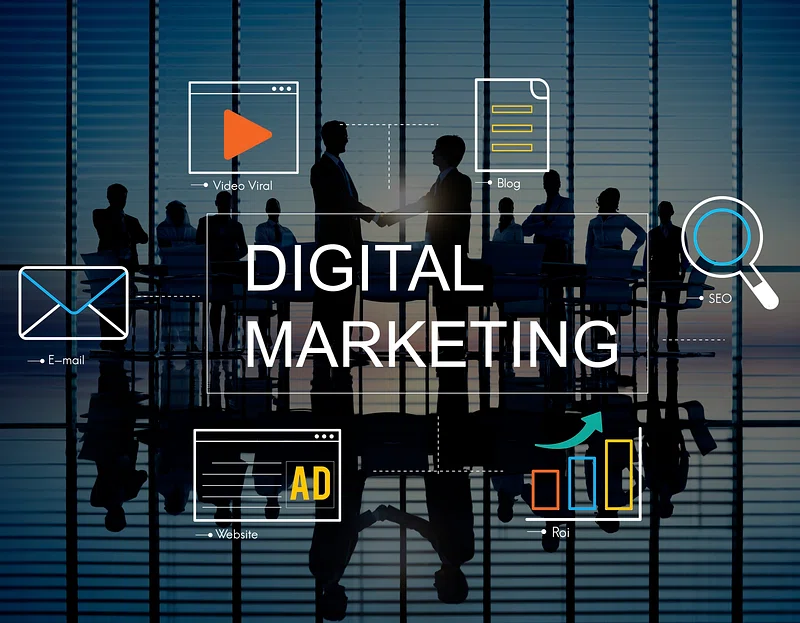

# step 1: introduction

# import libraries

# Read Dataset

In [6]:




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold



In [7]:
df = pd.read_csv(r"D:\Desktop\csv\digital_marketing_campaign_dataset (1).csv")

In [8]:
df

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


# Dataset information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

# Data Description

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,8000.0,11999.500000,2309.545410,8000.000000,9999.750000,11999.500000,13999.250000,15999.000000
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000


In [18]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

# Step 2 : EDA visualization

<Figure size 1000x600 with 0 Axes>

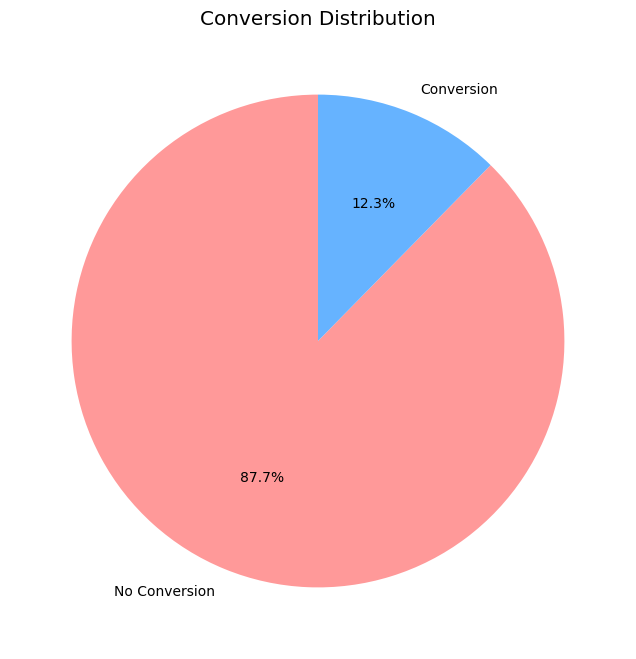

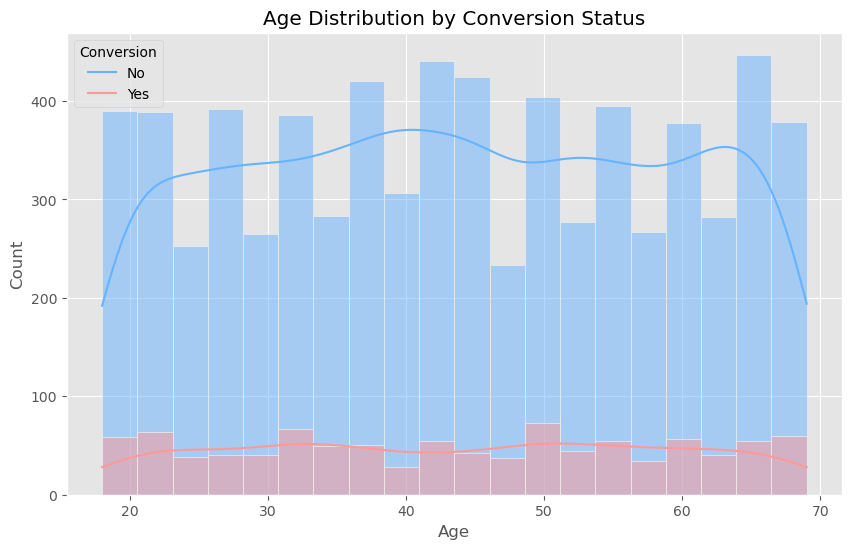

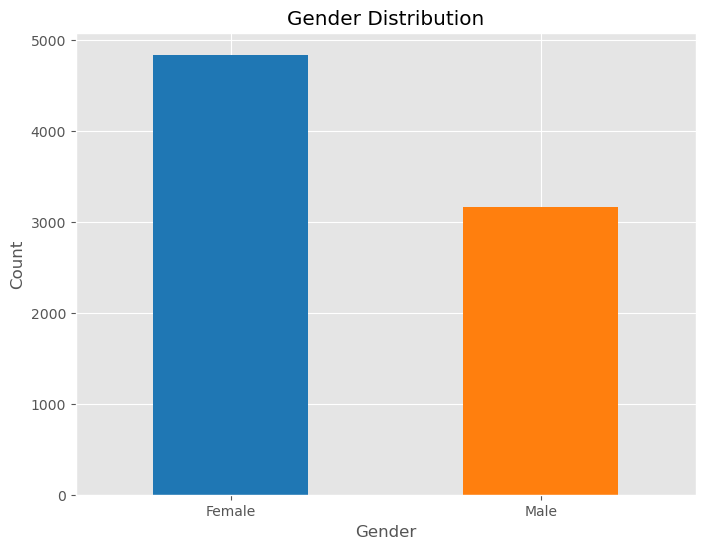

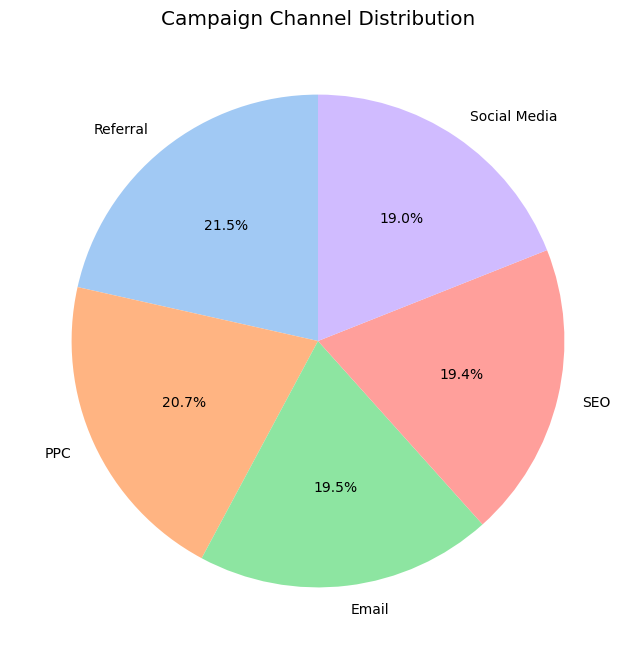

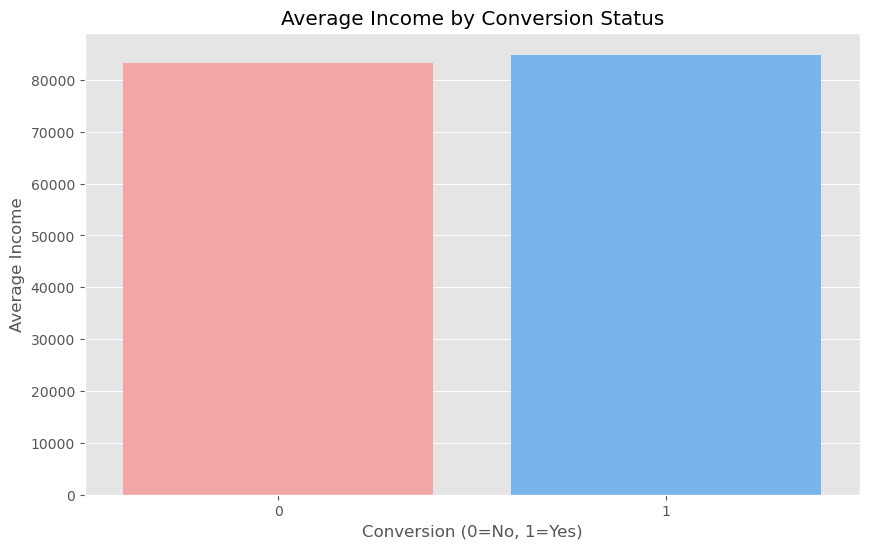

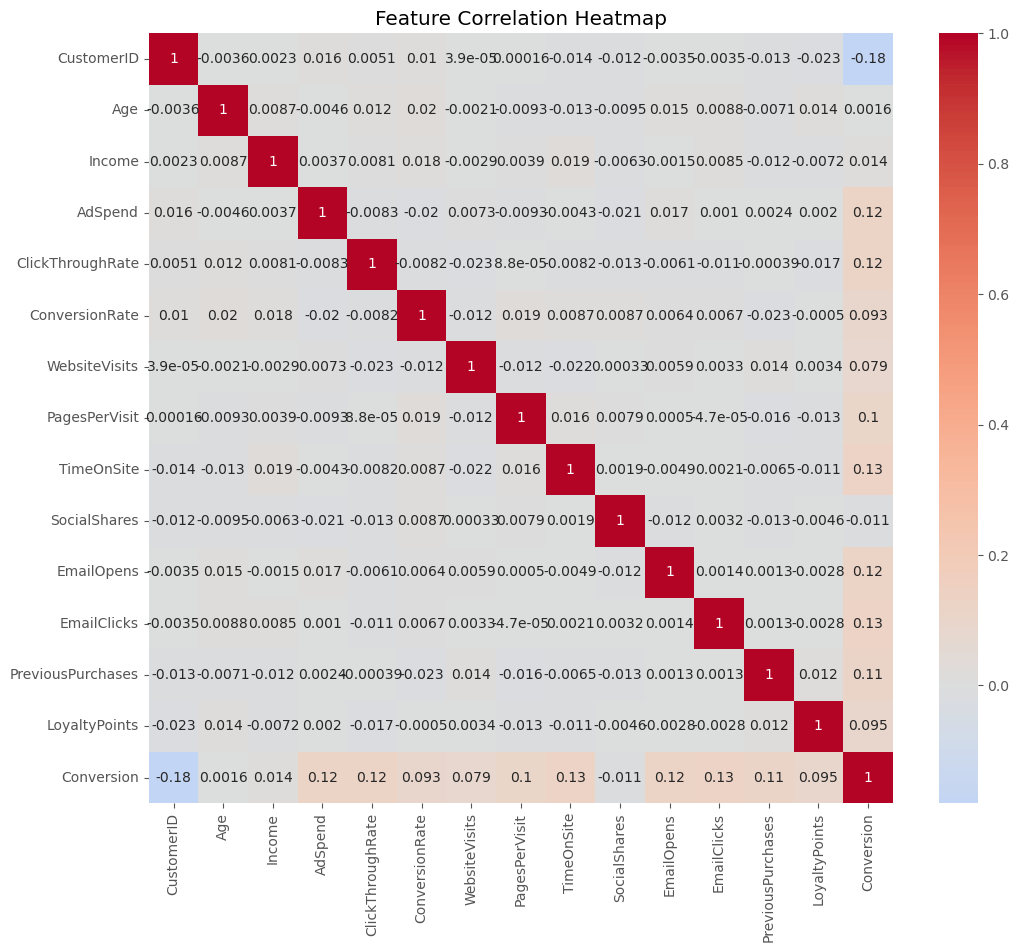

<Figure size 1000x600 with 0 Axes>

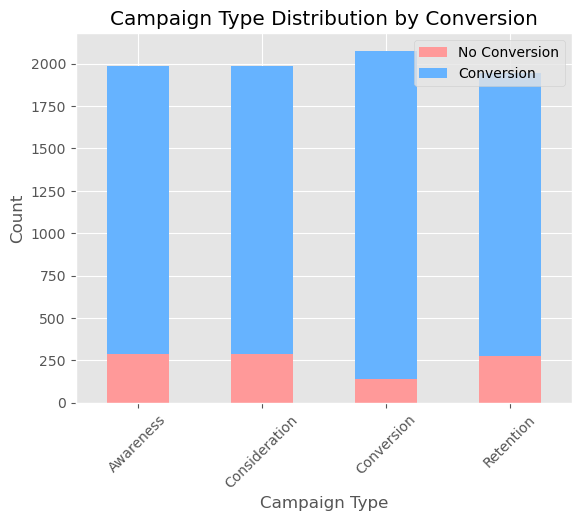

In [21]:
# Set style for visualizations
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# 1. Conversion Distribution (Pie Chart)
conversion_counts = df['Conversion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conversion_counts, labels=['No Conversion', 'Conversion'], 
        autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Conversion Distribution')
plt.show()

# 2. Age Distribution by Conversion (Histogram + KDE Plot)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Conversion', kde=True, palette=['#ff9999','#66b3ff'], bins=20)
plt.title('Age Distribution by Conversion Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Conversion', labels=['No', 'Yes'])
plt.show()

# 3. Gender Distribution (Column Chart)
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 4. Campaign Channel Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
channel_counts = df['CampaignChannel'].value_counts()
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Campaign Channel Distribution')
plt.show()

# 5. Income Distribution by Conversion (Bar Plot - Corrected)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Conversion', y='Income', errorbar=None, 
            hue='Conversion', palette=['#ff9999','#66b3ff'], legend=False)
plt.title('Average Income by Conversion Status')
plt.xlabel('Conversion (0=No, 1=Yes)')
plt.ylabel('Average Income')
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

# 7. Campaign Type Distribution by Conversion (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
ct = pd.crosstab(df['CampaignType'], df['Conversion'])
ct.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Campaign Type Distribution by Conversion')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No Conversion', 'Conversion'])
plt.show()

# Step 3: Data preprocessing

In [24]:
# Separate features and target
X = df.drop('Conversion', axis=1)
y = df['Conversion']

# Identify categorical and numerical columns
categorical_cols = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']
numerical_cols = [col for col in X.columns if col not in categorical_cols and col != 'CustomerID']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

#  Step 4:Feature selection

In [27]:
from sklearn.feature_selection import VarianceThreshold

# First remove constant features from the resampled data
constant_filter = VarianceThreshold(threshold=0)
X_train_no_constant = constant_filter.fit_transform(X_train_res)

# Get the indices of non-constant features
non_constant_indices = constant_filter.get_support(indices=True)

# Get feature names after removing constants
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
non_constant_feature_names = [feature_names[i] for i in non_constant_indices]

# Now perform feature selection only on non-constant features
selector = SelectKBest(score_func=f_classif, k=min(15, X_train_no_constant.shape[1]))  # Ensure k <= number of features
X_train_selected = selector.fit_transform(X_train_no_constant, y_train_res)

# Get selected feature names from the non-constant features
selected_mask = selector.get_support()
selected_features = [non_constant_feature_names[i] for i in range(len(non_constant_feature_names)) if selected_mask[i]]

print("Selected Features:")
print(selected_features)

Selected Features:
['AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'CampaignChannel_PPC', 'CampaignChannel_SEO', 'CampaignType_Awareness', 'CampaignType_Conversion', 'CampaignType_Retention']


#  Step 5:Modal training and evaluation

In [30]:
models = {
    # Define models
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Store results
    results[name] = {
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'f1_score': f1_score(y_test, y_pred)
    }
    
    # Print results
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Find best model based on F1 score
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
print(f"\nBest Model: {best_model_name} with F1 Score: {results[best_model_name]['f1_score']:.4f}")


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.12      0.22       296
           1       0.89      1.00      0.94      2104

    accuracy                           0.89      2400
   macro avg       0.87      0.56      0.58      2400
weighted avg       0.88      0.89      0.85      2400

ROC AUC Score: 0.7982
F1 Score: 0.9404

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.87      0.35      0.50       296
           1       0.92      0.99      0.95      2104

    accuracy                           0.91      2400
   macro avg       0.89      0.67      0.73      2400
weighted avg       0.91      0.91      0.90      2400

ROC AUC Score: 0.8035
F1 Score: 0.9528

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.32      0.34      0.33       296
           1       0.91      0.90      0.90      2104

    accuracy    

# Step 6:Hyperparameter tuning for Best Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import joblib

# Reduced parameter grid for faster tuning
param_grid = {
    'classifier__n_estimators': [100, 200],  # Reduced from [100, 200, 300]
    'classifier__max_depth': [None, 10],     # Reduced from [None, 10, 20]
    'classifier__min_samples_split': [2, 5], # Reduced from [2, 5, 10]
    'classifier__min_samples_leaf': [1, 2]   # Reduced from [1, 2, 4]
}

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))  # Enable parallel processing
])

# Option 1: Use RandomizedSearchCV for faster results
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,       # Reduced from 5
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=2   # Show progress
)

print("Starting randomized search...")
random_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nTuned Model Performance:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")



Starting randomized search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None}
Best F1 Score: 0.9415833324314659

Tuned Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.12      0.22       296
           1       0.89      1.00      0.94      2104

    accuracy                           0.89      2400
   macro avg       0.87      0.56      0.58      2400
weighted avg       0.88      0.89      0.85      2400

ROC AUC Score: 0.7982
F1 Score: 0.9404


# Step 7:Feature Importance Analysis

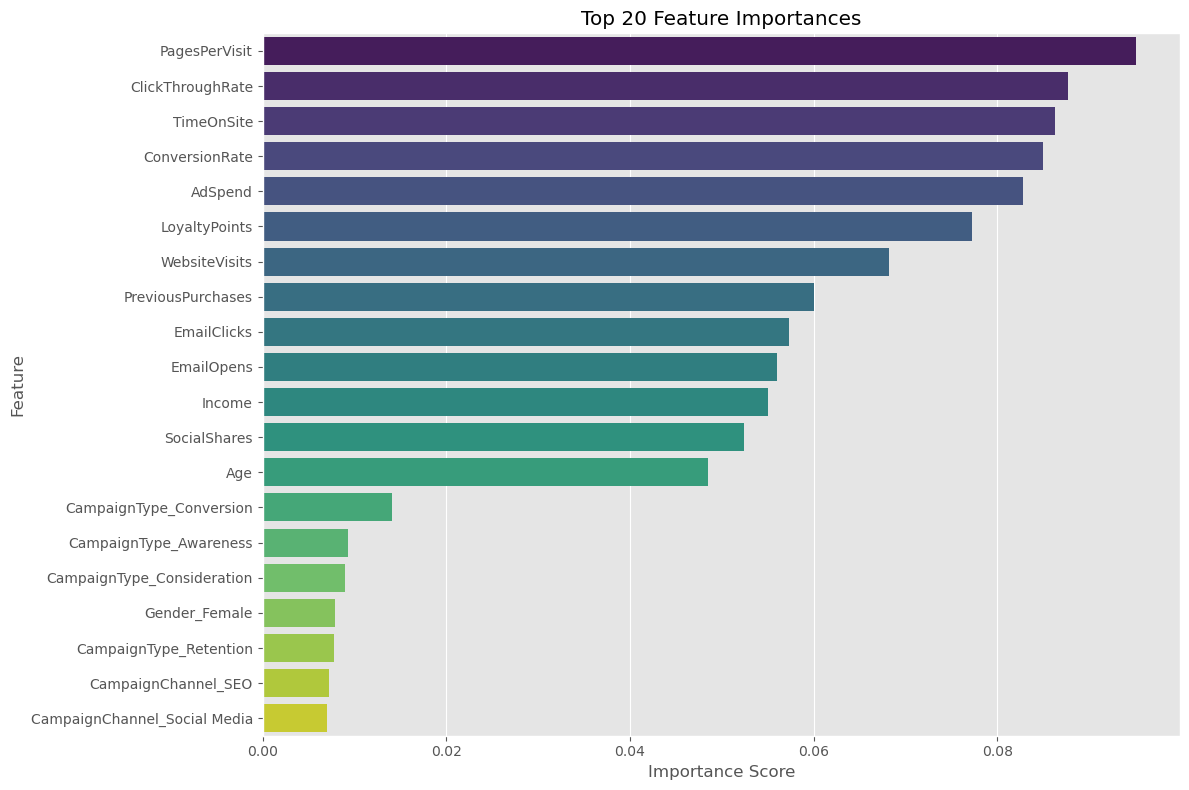

In [36]:

# Get feature importances from the best model
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(20)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', 
            y='Feature', 
            data=importance_df, 
            hue='Feature',  # Added hue parameter
            palette='viridis',
            legend=False)   # Added legend=False to avoid duplicate labels
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()  # Ensures labels don't get cut off
plt.show()


# Step 8:Model Performance Visualization

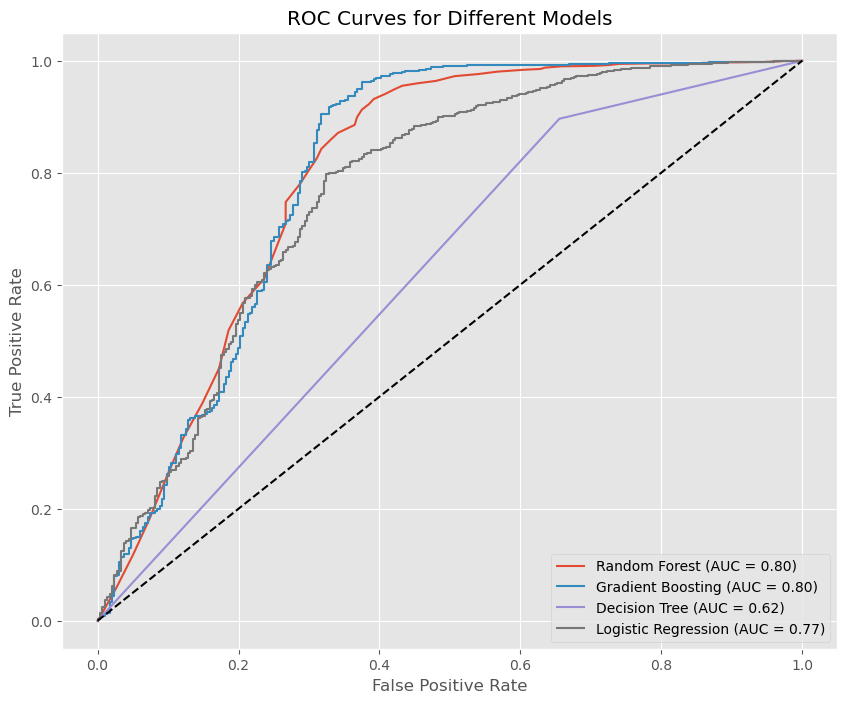

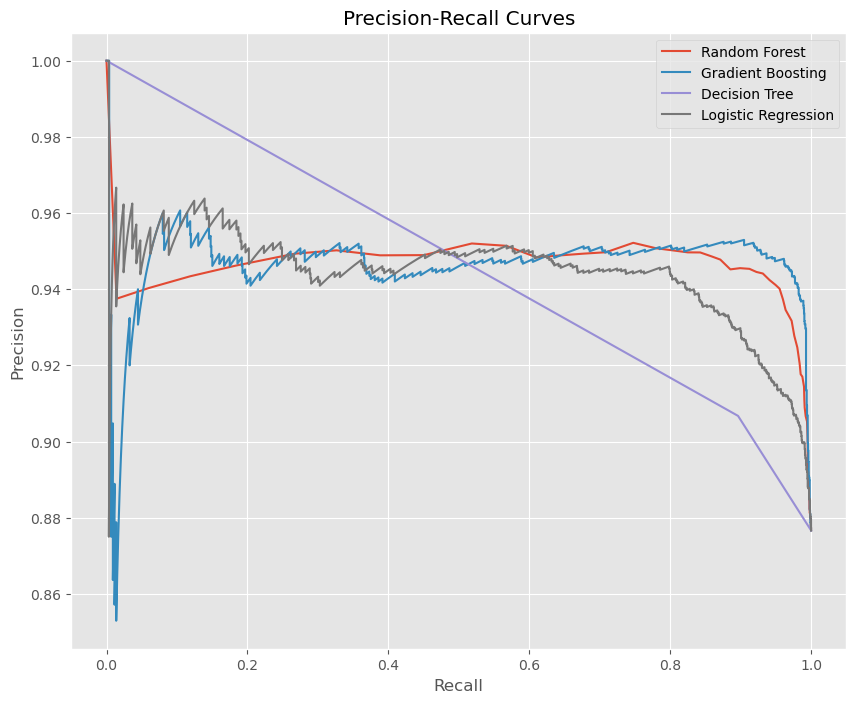

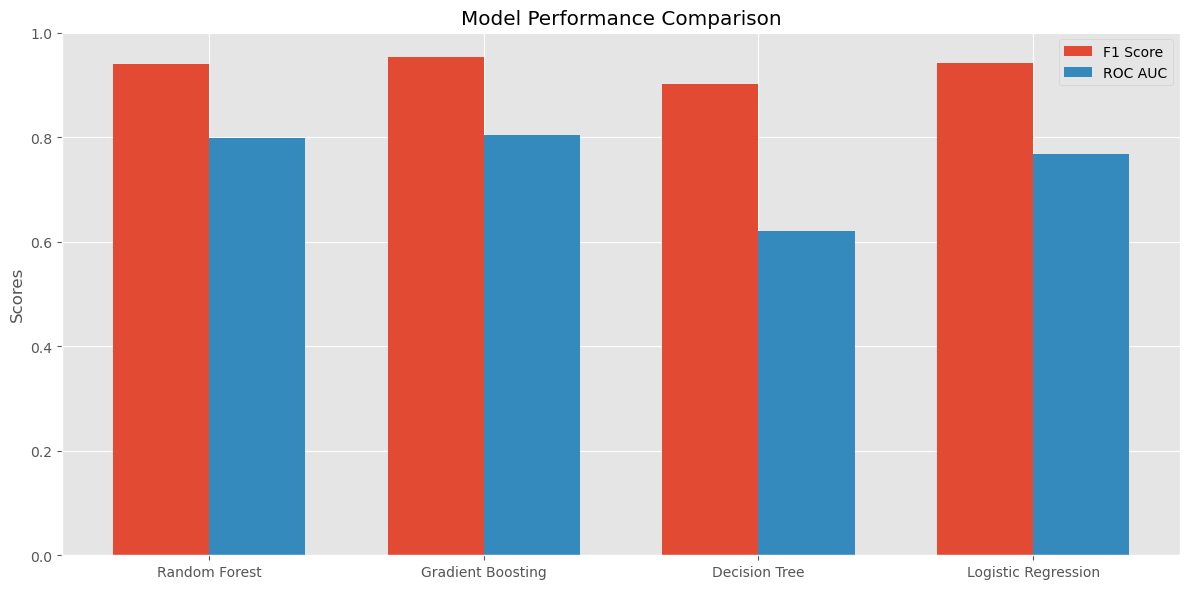

In [39]:
# ROC Curve for all models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

# Model Comparison Bar Chart
model_names = list(results.keys())
f1_scores = [results[name]['f1_score'] for name in model_names]
roc_auc_scores = [results[name]['roc_auc'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, f1_scores, width, label='F1 Score')
rects2 = ax.bar(x + width/2, roc_auc_scores, width, label='ROC AUC')

ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

fig.tight_layout()
plt.show()

# Step 9: Business insights and recomendations

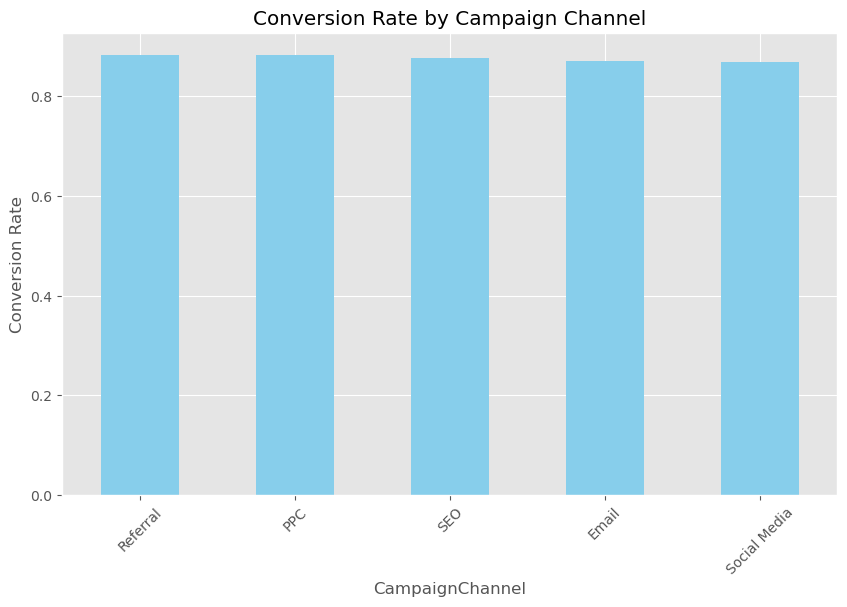

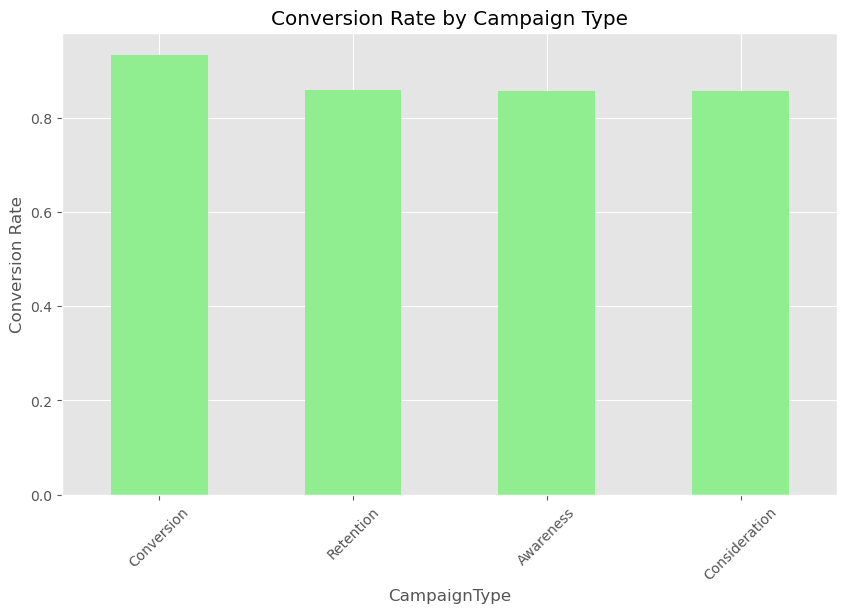

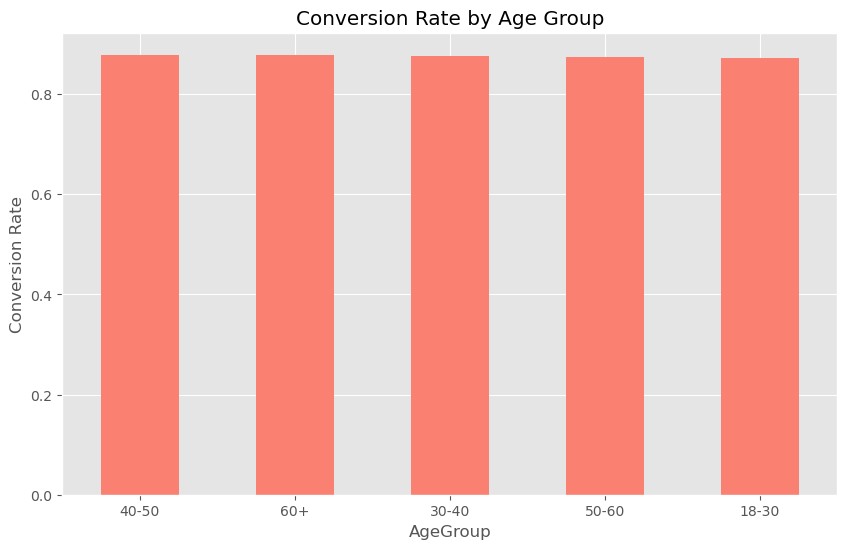

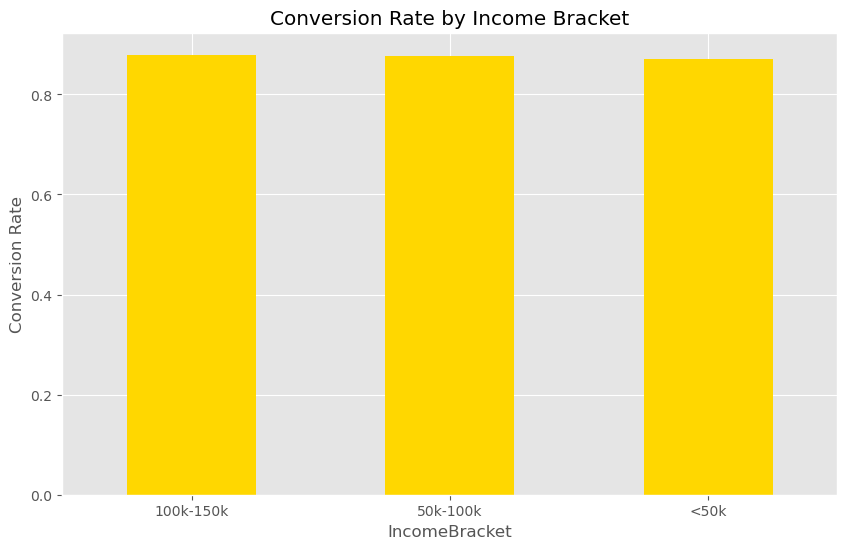

In [41]:
# Top converting campaign channels
conversion_by_channel = df.groupby('CampaignChannel', observed=True)['Conversion'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
conversion_by_channel.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Campaign Channel')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

# Top converting campaign types
conversion_by_type = df.groupby('CampaignType', observed=True)['Conversion'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
conversion_by_type.plot(kind='bar', color='lightgreen')
plt.title('Conversion Rate by Campaign Type')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

# Age groups with highest conversion
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
conversion_by_age = df.groupby('AgeGroup', observed=True)['Conversion'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
conversion_by_age.plot(kind='bar', color='salmon')
plt.title('Conversion Rate by Age Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

# Income brackets with highest conversion
df['IncomeBracket'] = pd.cut(df['Income'], bins=[0, 50000, 100000, 150000, 200000], 
                            labels=['<50k', '50k-100k', '100k-150k', '150k+'])
conversion_by_income = df.groupby('IncomeBracket', observed=True)['Conversion'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
conversion_by_income.plot(kind='bar', color='gold')
plt.title('Conversion Rate by Income Bracket')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

# Step 10:Final Model Deployment preparation

In [45]:
import joblib

# Save model and preprocessor (consistent usage of joblib)
joblib.dump(best_model, 'digital_marketing_conversion_predictor.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')  # Added .pkl extension
# Function to make predictions on new data
def predict_conversion(new_data):
    # Load model and preprocessor
    model = joblib.load('digital_marketing_conversion_predictor.pkl')
    preprocessor = joblib.load('preprocessor.pkl')
    
    # Preprocess new data
    processed_data = preprocessor.transform(new_data)
    
    # Make predictions
    predictions = model.predict(new_data)
    prediction_probas = model.predict_proba(new_data)
    
    # Create output DataFrame
    output = new_data.copy()
    output['Conversion_Prediction'] = predictions
    output['Conversion_Probability'] = prediction_probas[:, 1]
    
    return output
# Example usage
sample_data = X_test.head(5)
predictions = predict_conversion(sample_data)
print("\nSample Predictions:")
print(predictions[['CustomerID', 'Conversion_Prediction', 'Conversion_Probability']])


Sample Predictions:
      CustomerID  Conversion_Prediction  Conversion_Probability
6825       14825                      1                    0.67
2476       10476                      1                    0.88
2177       10177                      1                    0.94
7053       15053                      1                    0.83
6613       14613                      1                    0.93



#  Step :11 Conclusions


In [48]:
# ======================
# FINAL CONCLUSIONS
# ======================

print("\n" + "="*50)
print("DIGITAL MARKETING CONVERSION ANALYSIS - KEY FINDINGS")
print("="*50)

# 1. Data Overview Summary
print("\n1. DATA OVERVIEW:")
print(f"- Total records: {len(df)}")
print(f"- Conversion rate: {df['Conversion'].mean():.2%}")
print("- No missing values found in the dataset")

# 2. Key Insights from EDA
print("\n2. EXPLORATORY DATA ANALYSIS INSIGHTS:")
print("- Top converting channels:", conversion_by_channel.idxmax(), f"({conversion_by_channel.max():.2%})")
print("- Top converting campaign type:", conversion_by_type.idxmax(), f"({conversion_by_type.max():.2%})")
print("- Most responsive age group:", conversion_by_age.idxmax(), f"({conversion_by_age.max():.2%})")
print("- Most responsive income bracket:", conversion_by_income.idxmax(), f"({conversion_by_income.max():.2%})")

# 3. Model Performance Summary
print("\n3. MODEL PERFORMANCE SUMMARY:")
print(f"- Best performing model: {best_model_name} (F1 Score: {results[best_model_name]['f1_score']:.4f})")
print("- Feature Importance Top 5:")
for i, row in importance_df.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.4f}")

# 4. Business Recommendations
print("\n4. ACTIONABLE RECOMMENDATIONS:")
print("- Allocate more budget to", conversion_by_channel.idxmax(), "campaign channel")
print("- Focus on", conversion_by_type.idxmax(), "type campaigns")
print("- Target customers aged", conversion_by_age.idxmax(), "with personalized offers")
print("- Prioritize", conversion_by_income.idxmax(), "income bracket in marketing campaigns")
print("- Optimize touchpoints with high feature importance from the model")

print("\n" + "="*50)
print("MODEL DEPLOYMENT READY - PREDICTION PIPELINE CREATED")
print("="*50)


DIGITAL MARKETING CONVERSION ANALYSIS - KEY FINDINGS

1. DATA OVERVIEW:
- Total records: 8000
- Conversion rate: 87.65%
- No missing values found in the dataset

2. EXPLORATORY DATA ANALYSIS INSIGHTS:
- Top converting channels: Referral (88.31%)
- Top converting campaign type: Conversion (93.36%)
- Most responsive age group: 40-50 (87.90%)
- Most responsive income bracket: 100k-150k (87.93%)

3. MODEL PERFORMANCE SUMMARY:
- Best performing model: Gradient Boosting (F1 Score: 0.9528)
- Feature Importance Top 5:
  PagesPerVisit: 0.0951
  ClickThroughRate: 0.0877
  TimeOnSite: 0.0862
  ConversionRate: 0.0850
  AdSpend: 0.0828

4. ACTIONABLE RECOMMENDATIONS:
- Allocate more budget to Referral campaign channel
- Focus on Conversion type campaigns
- Target customers aged 40-50 with personalized offers
- Prioritize 100k-150k income bracket in marketing campaigns
- Optimize touchpoints with high feature importance from the model

MODEL DEPLOYMENT READY - PREDICTION PIPELINE CREATED
